# Frage 1: Wie viele Exemplare gibt es für die jeweils vordefinierten Titelarten?

## Import der Bibliotheken

In [38]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importieren der Datensätze und Aufbereitung

In [2]:
# Datenset importieren
url = "https://datasets.imdbws.com/title.akas.tsv.gz"

In [22]:
# CSV Datei benennen
title_information_file = "title_information.csv"

In [23]:
# lokaler download der Datei
urllib.request.urlretrieve(url, title_information_file) 

('title_information.csv', <http.client.HTTPMessage at 0x7fea8aa2c790>)

In [6]:
# auslesen der datei und speichern in einer variabeln
title = pd.read_csv(title_information_file, compression='gzip', sep = "\t") 

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# Anzeigen der Datei 
title 

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
32289116,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
32289117,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
32289118,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
32289119,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [8]:
#Filterung nach der Spalte types
title.types

0           imdbDisplay
1                    \N
2           imdbDisplay
3           imdbDisplay
4           imdbDisplay
               ...     
32289116             \N
32289117             \N
32289118             \N
32289119    imdbDisplay
32289120       original
Name: types, Length: 32289121, dtype: object

In [53]:
# Berechnung vom Vorkommen der einzelnen Titelarten in der Spalte types
title.groupby(["types"]).sum()

,ordering
types,
\N,107070121
alternative,603226
alternativedvd,94
alternativefestival,58
alternativetv,106
alternativevideo,8
alternativeworking,45
dvd,178719
dvdimdbDisplay,2698


In [55]:
# Benennung des neuen Datenset
grouped_title = title.groupby(["types"]).sum()

#### Grafische Darstellung

<AxesSubplot:ylabel='ordering'>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


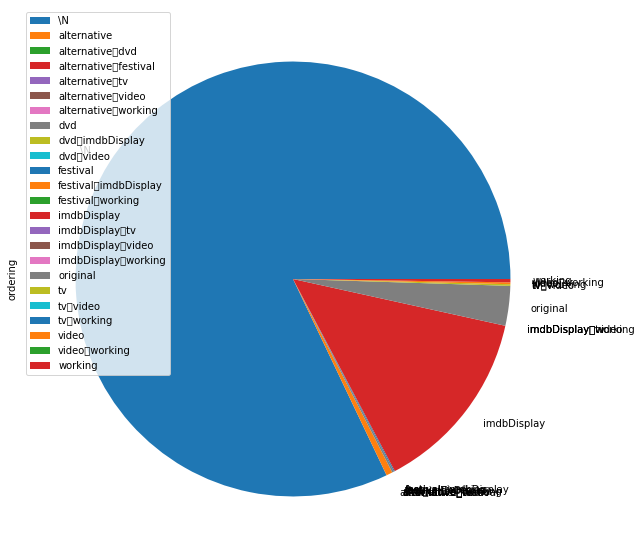

In [60]:
# Erstellung eines Torten Diagramms
grouped_title.plot.pie(y = 'ordering', figsize = (10, 10))

<AxesSubplot:ylabel='types'>

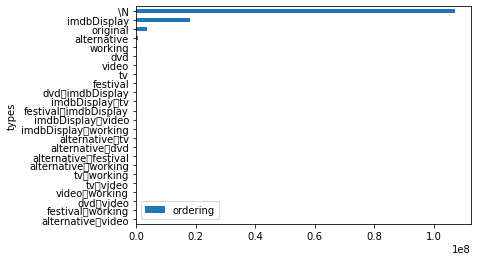

In [66]:
# Erstellung eines Balkendiagramms für eine bessere grafische Darstellung
title.groupby(["types"]).sum().sort_values(by = "ordering", ascending = True).plot.barh()